In [1]:
from brainpipe.system import study
import numpy as np
from itertools import product
from os.path import join

from brainets.spectral import mt_lf, mt_hga
import mne
from brainpipe.feature import power
from brainpipe.feat.utils._feat import _manageWindow
st = study('Olfacto')

-> Olfacto loaded


In [49]:
"""Compute instantaneous power for high freqs (50-150Hz) and lower freqs """

path_pow = join(st.path, 'database/Encoding_By_Cond_v=1_elecs=all/')
path_save = join(st.path, 'feature/Conn_instant_Theta_HG_FRITE/')
filename = join(path_pow, '{}_odor_{}_E.npz')
filesave = join(path_save, '{}_odor_{}_E_2freqs.npz')

conds, rois = ['high','low'], ['aHC','OFC_olf']
subjects = ['FERJ','LEFC','PIRJ','SEMC','VACJ']
#subjects = ['PIRJ']

for su in subjects:
    data = np.load(filename.format(su,conds[0]),allow_pickle=True)
    idx = [i for i,lab in enumerate(data['Mai_RL']) if lab in rois]
    #print(su, data.files, data['Mai_RL'],list(data['Mai_RL'][idx]),idx)

    if len(idx) > 0:
        pow_HG, pow_Th, y = np.array([]), np.array([]), []
        for i, cond in enumerate(conds):
            data = np.load(filename.format(su,cond), allow_pickle=True)
            data_sel = data['x'][idx,:,:]
            data_sel_mne = data_sel.swapaxes(0,2).swapaxes(1,2) #nchans ntimes nepochs
            chans = [str(x) for x in data['channels'][idx]]
            info = mne.create_info(ch_names=chans, sfreq=512.) 
            epochs = mne.EpochsArray(data_sel_mne,info=info) #nepochs nchans ntimes
            
            ft_theta = power(512, data_sel.shape[1], baseline=None,
                             f=[3,7], method='hilbert1').get(data_sel,n_jobs=-1)[0]
            ft_highG = mt_hga(epochs, n_cycles=15, time_bandwidth=15, 
                                  log_transform=False, picks = 'all')
            
            ft_theta = ft_theta[:,:,1024:2560,:]
            ft_highG = ft_highG.data[:,:,:,1024:2560]
            y.extend([i]*ft_highG.shape[0])
            pow_Th = np.concatenate((pow_Th,ft_theta),axis=-1) if np.size(pow_Th) else ft_theta
            pow_HG = np.concatenate((pow_HG,ft_highG),axis=0) if np.size(pow_HG) else ft_highG
        pow_Th = pow_Th.swapaxes(1,3).swapaxes(2,3)
        pow_HG = pow_HG.swapaxes(0,2).swapaxes(1,2)
        print(pow_HG.shape, pow_Th.shape)

        new_npz = {}
        for f in ['Mai_RL','xyz','channels']:
            #print(idx, su, data[f], data[f][idx])
            new_npz[f] = data[f][idx]
        new_npz['pow_HG'], new_npz['pow_Th'], new_npz['y'] = pow_HG, pow_Th, y
        _ , time = _manageWindow(data_sel.shape[1], width=None, step=None)
        new_npz['time'] = (np.array(time[1024:2560]) / 512) - 3
        np.savez(filesave.format(su,'all_3conds'),**new_npz)


9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


Spectral properties :
- Frequency of interest (foi) : 100.0Hz
- Number of cycles : 15
- Number of tapers : 14
- Time x Full bandwidth : 15.0
- Temporal smoothing (T) : 0.1s
- foi +/- W : [50.0, 150.0]Hz


16 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


Spectral properties :
- Frequency of interest (foi) : 100.0Hz
- Number of cycles : 15
- Number of tapers : 14
- Time x Full bandwidth : 15.0
- Temporal smoothing (T) : 0.1s
- foi +/- W : [50.0, 150.0]Hz


(1, 25, 14, 1536) (1, 25, 14, 1536)
17 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


Spectral properties :
- Frequency of interest (foi) : 100.0Hz
- Number of cycles : 15
- Number of tapers : 14
- Time x Full bandwidth : 15.0
- Temporal smoothing (T) : 0.1s
- foi +/- W : [50.0, 150.0]Hz


23 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


Spectral properties :
- Frequency of interest (foi) : 100.0Hz
- Number of cycles : 15
- Number of tapers : 14
- Time x Full bandwidth : 15.0
- Temporal smoothing (T) : 0.1s
- foi +/- W : [50.0, 150.0]Hz


(1, 40, 13, 1536) (1, 40, 13, 1536)
2 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


Spectral properties :
- Frequency of interest (foi) : 100.0Hz
- Number of cycles : 15
- Number of tapers : 14
- Time x Full bandwidth : 15.0
- Temporal smoothing (T) : 0.1s
- foi +/- W : [50.0, 150.0]Hz


14 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


Spectral properties :
- Frequency of interest (foi) : 100.0Hz
- Number of cycles : 15
- Number of tapers : 14
- Time x Full bandwidth : 15.0
- Temporal smoothing (T) : 0.1s
- foi +/- W : [50.0, 150.0]Hz


(1, 16, 11, 1536) (1, 16, 11, 1536)
9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


Spectral properties :
- Frequency of interest (foi) : 100.0Hz
- Number of cycles : 15
- Number of tapers : 14
- Time x Full bandwidth : 15.0
- Temporal smoothing (T) : 0.1s
- foi +/- W : [50.0, 150.0]Hz


21 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


Spectral properties :
- Frequency of interest (foi) : 100.0Hz
- Number of cycles : 15
- Number of tapers : 14
- Time x Full bandwidth : 15.0
- Temporal smoothing (T) : 0.1s
- foi +/- W : [50.0, 150.0]Hz


(1, 30, 8, 1536) (1, 30, 8, 1536)
9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


Spectral properties :
- Frequency of interest (foi) : 100.0Hz
- Number of cycles : 15
- Number of tapers : 14
- Time x Full bandwidth : 15.0
- Temporal smoothing (T) : 0.1s
- foi +/- W : [50.0, 150.0]Hz


9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


Spectral properties :
- Frequency of interest (foi) : 100.0Hz
- Number of cycles : 15
- Number of tapers : 14
- Time x Full bandwidth : 15.0
- Temporal smoothing (T) : 0.1s
- foi +/- W : [50.0, 150.0]Hz


(1, 18, 12, 1536) (1, 18, 12, 1536)


In [42]:
from frites.utils import define_windows
from frites.conn import conn_dfc
from frites.dataset import DatasetEphy
from frites.workflow import WfMi

""" Compute undirected Dynamic Functional Connectivity (DFC)"""
path_save = join(st.path, 'feature/Conn_instant_Theta_HG_FRITE/')
filesave = join(path_save, '{}_odor_{}_E_2freqs.npz')
conn_save = join(path_save, '{}_conn_{}_{}_E_2freqs.nc')
#win parametres in sec - windows to compute DFC
#TO BE adapted to the size (in time) of the effect
slwin_len = .5
slwin_step = .1
subjects = ['FERJ','LEFC','PIRJ','SEMC','VACJ']
features = ['pow_HG','pow_Th']

for su,feat in product(subjects,features):
    
    """ Compute undirected Dynamic Functional Connectivity (DFC)"""
    data = np.load(filesave.format(su,'all_3conds'),allow_pickle=True)
    ch_names = np.array([f"{ch}_{lab}" for ch,lab in zip(data['channels'],data['Mai_RL'])])
    print(su, data.files, data['Mai_RL'])
    
    win_sample = define_windows(times=data['time'], slwin_len=slwin_len,
                            slwin_step=slwin_step)[0]
    dfc_inst = conn_dfc(data[feat].squeeze(), data['time'], 
                        ch_names, win_sample, verbose=False)[0]
    dfc_inst.attrs['y'] = data['y']
    dfc_inst.to_netcdf(conn_save.format(su,feat,'DFC'))
    
    """ Compute Statistics for DFC"""
    dataset_dfc_inst = DatasetEphy(x=list(dfc_inst.data[np.newaxis]),
                                   y=list(dfc_inst.attrs['y'][np.newaxis]), 
                                   times=dfc_inst['times'].data, 
                                   roi=list(dfc_inst['roi'].data[np.newaxis]))
    wf_dfc_inst = WfMi(mi_type='cd', inference='ffx') #workflow
    mi_dfc, mi_dfc_p = wf_dfc_inst.fit(dataset_dfc_inst,
                                 mcp='cluster',n_perm=100, n_jobs=4, random_state=0)
    mi_dfc.to_netcdf(conn_save.format(su,feat,'MI'))
    mi_dfc_p.to_netcdf(conn_save.format(su,feat,'MI_p'))

Defining temporal windows
    Definition of sliding windows (len=0.5, start=-1.0, stop=1.998046875, step=0.1)
    25 windows defined


FERJ ['Mai_RL', 'xyz', 'channels', 'pow_HG', 'pow_Th', 'y', 'time'] ['aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'aHC'
 'aHC' 'aHC']


Definition of an electrophysiological dataset
    NumPy inputs detected
    Allowed mi_type=cd (y.dtype=int; z.dtype=none)
Dataset composed of 1 subjects. At least -inf subjects per roi are required
Definition of a non-parametric statistical workflow
Workflow for computing mutual information (ffx - gc - cd)
    Group data by roi
    Apply copnorm (per subject=False; mi_type=cd)
    Evaluate true and permuted mi (n_perm=100, n_jobs=4)
    Fixed-effect inference (FFX)
    Cluster forming threshold (tail=1; alpha=0.05; tfce=None)
    Inference at cluster-level
    Cluster detection (threshold=0.08220240373957075; tail=1)
Defining temporal windows
    Definition of sliding windows (len=0.5, start=-1.0, stop=1.998046875, step=0.1)
    25 windows defined


FERJ ['Mai_RL', 'xyz', 'channels', 'pow_HG', 'pow_Th', 'y', 'time'] ['aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'aHC'
 'aHC' 'aHC']


Definition of an electrophysiological dataset
    NumPy inputs detected
    Allowed mi_type=cd (y.dtype=int; z.dtype=none)
Dataset composed of 1 subjects. At least -inf subjects per roi are required
Definition of a non-parametric statistical workflow
Workflow for computing mutual information (ffx - gc - cd)
    Group data by roi
    Apply copnorm (per subject=False; mi_type=cd)
    Evaluate true and permuted mi (n_perm=100, n_jobs=4)
    Fixed-effect inference (FFX)
    Cluster forming threshold (tail=1; alpha=0.05; tfce=None)
    Inference at cluster-level
    Cluster detection (threshold=0.08167272578352039; tail=1)
Defining temporal windows
    Definition of sliding windows (len=0.5, start=-1.0, stop=1.998046875, step=0.1)
    25 windows defined


LEFC ['Mai_RL', 'xyz', 'channels', 'pow_HG', 'pow_Th', 'y', 'time'] ['aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'OFC_olf' 'OFC_olf'
 'OFC_olf' 'OFC_olf' 'OFC_olf']


Definition of an electrophysiological dataset
    NumPy inputs detected
    Allowed mi_type=cd (y.dtype=int; z.dtype=none)
Dataset composed of 1 subjects. At least -inf subjects per roi are required
Definition of a non-parametric statistical workflow
Workflow for computing mutual information (ffx - gc - cd)
    Group data by roi
    Apply copnorm (per subject=False; mi_type=cd)
    Evaluate true and permuted mi (n_perm=100, n_jobs=4)
    Fixed-effect inference (FFX)
    Cluster forming threshold (tail=1; alpha=0.05; tfce=None)
    Inference at cluster-level
    Cluster detection (threshold=0.04613275815135051; tail=1)
Defining temporal windows
    Definition of sliding windows (len=0.5, start=-1.0, stop=1.998046875, step=0.1)
    25 windows defined


LEFC ['Mai_RL', 'xyz', 'channels', 'pow_HG', 'pow_Th', 'y', 'time'] ['aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'OFC_olf' 'OFC_olf'
 'OFC_olf' 'OFC_olf' 'OFC_olf']


Definition of an electrophysiological dataset
    NumPy inputs detected
    Allowed mi_type=cd (y.dtype=int; z.dtype=none)
Dataset composed of 1 subjects. At least -inf subjects per roi are required
Definition of a non-parametric statistical workflow
Workflow for computing mutual information (ffx - gc - cd)
    Group data by roi
    Apply copnorm (per subject=False; mi_type=cd)
    Evaluate true and permuted mi (n_perm=100, n_jobs=4)
    Fixed-effect inference (FFX)
    Cluster forming threshold (tail=1; alpha=0.05; tfce=None)
    Inference at cluster-level
    Cluster detection (threshold=0.045917486137179574; tail=1)
Defining temporal windows
    Definition of sliding windows (len=0.5, start=-1.0, stop=1.998046875, step=0.1)
    25 windows defined


PIRJ ['Mai_RL', 'xyz', 'channels', 'pow_HG', 'pow_Th', 'y', 'time'] ['aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'OFC_olf' 'OFC_olf' 'OFC_olf'
 'OFC_olf']


Definition of an electrophysiological dataset
    NumPy inputs detected
    Allowed mi_type=cd (y.dtype=int; z.dtype=none)
Dataset composed of 1 subjects. At least -inf subjects per roi are required
Definition of a non-parametric statistical workflow
Workflow for computing mutual information (ffx - gc - cd)
    Group data by roi
    Apply copnorm (per subject=False; mi_type=cd)
    Evaluate true and permuted mi (n_perm=100, n_jobs=4)
    Fixed-effect inference (FFX)
    Cluster forming threshold (tail=1; alpha=0.05; tfce=None)
    Inference at cluster-level
    Cluster detection (threshold=0.10025313832740688; tail=1)
Defining temporal windows
    Definition of sliding windows (len=0.5, start=-1.0, stop=1.998046875, step=0.1)
    25 windows defined


PIRJ ['Mai_RL', 'xyz', 'channels', 'pow_HG', 'pow_Th', 'y', 'time'] ['aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'OFC_olf' 'OFC_olf' 'OFC_olf'
 'OFC_olf']


Definition of an electrophysiological dataset
    NumPy inputs detected
    Allowed mi_type=cd (y.dtype=int; z.dtype=none)
Dataset composed of 1 subjects. At least -inf subjects per roi are required
Definition of a non-parametric statistical workflow
Workflow for computing mutual information (ffx - gc - cd)
    Group data by roi
    Apply copnorm (per subject=False; mi_type=cd)
    Evaluate true and permuted mi (n_perm=100, n_jobs=4)
    Fixed-effect inference (FFX)
    Cluster forming threshold (tail=1; alpha=0.05; tfce=None)
    Inference at cluster-level
    Cluster detection (threshold=0.10000128077186983; tail=1)
Defining temporal windows
    Definition of sliding windows (len=0.5, start=-1.0, stop=1.998046875, step=0.1)
    25 windows defined


SEMC ['Mai_RL', 'xyz', 'channels', 'pow_HG', 'pow_Th', 'y', 'time'] ['aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'OFC_olf' 'OFC_olf' 'OFC_olf']


Definition of an electrophysiological dataset
    NumPy inputs detected
    Allowed mi_type=cd (y.dtype=int; z.dtype=none)
Dataset composed of 1 subjects. At least -inf subjects per roi are required
Definition of a non-parametric statistical workflow
Workflow for computing mutual information (ffx - gc - cd)
    Group data by roi
    Apply copnorm (per subject=False; mi_type=cd)
    Evaluate true and permuted mi (n_perm=100, n_jobs=4)
    Fixed-effect inference (FFX)
    Cluster forming threshold (tail=1; alpha=0.05; tfce=None)
    Inference at cluster-level
    Cluster detection (threshold=0.0664977281279871; tail=1)
Defining temporal windows
    Definition of sliding windows (len=0.5, start=-1.0, stop=1.998046875, step=0.1)
    25 windows defined


SEMC ['Mai_RL', 'xyz', 'channels', 'pow_HG', 'pow_Th', 'y', 'time'] ['aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'OFC_olf' 'OFC_olf' 'OFC_olf']


Definition of an electrophysiological dataset
    NumPy inputs detected
    Allowed mi_type=cd (y.dtype=int; z.dtype=none)
Dataset composed of 1 subjects. At least -inf subjects per roi are required
Definition of a non-parametric statistical workflow
Workflow for computing mutual information (ffx - gc - cd)
    Group data by roi
    Apply copnorm (per subject=False; mi_type=cd)
    Evaluate true and permuted mi (n_perm=100, n_jobs=4)
    Fixed-effect inference (FFX)
    Cluster forming threshold (tail=1; alpha=0.05; tfce=None)
    Inference at cluster-level
    Cluster detection (threshold=0.06795496065182646; tail=1)
Defining temporal windows
    Definition of sliding windows (len=0.5, start=-1.0, stop=1.998046875, step=0.1)
    25 windows defined


VACJ ['Mai_RL', 'xyz', 'channels', 'pow_HG', 'pow_Th', 'y', 'time'] ['aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'OFC_olf' 'OFC_olf'
 'OFC_olf' 'OFC_olf']


Definition of an electrophysiological dataset
    NumPy inputs detected
    Allowed mi_type=cd (y.dtype=int; z.dtype=none)
Dataset composed of 1 subjects. At least -inf subjects per roi are required
Definition of a non-parametric statistical workflow
Workflow for computing mutual information (ffx - gc - cd)
    Group data by roi
    Apply copnorm (per subject=False; mi_type=cd)
    Evaluate true and permuted mi (n_perm=100, n_jobs=4)
    Fixed-effect inference (FFX)
    Cluster forming threshold (tail=1; alpha=0.05; tfce=None)
    Inference at cluster-level
    Cluster detection (threshold=0.11314709916317263; tail=1)
Defining temporal windows
    Definition of sliding windows (len=0.5, start=-1.0, stop=1.998046875, step=0.1)
    25 windows defined


VACJ ['Mai_RL', 'xyz', 'channels', 'pow_HG', 'pow_Th', 'y', 'time'] ['aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'aHC' 'OFC_olf' 'OFC_olf'
 'OFC_olf' 'OFC_olf']


Definition of an electrophysiological dataset
    NumPy inputs detected
    Allowed mi_type=cd (y.dtype=int; z.dtype=none)
Dataset composed of 1 subjects. At least -inf subjects per roi are required
Definition of a non-parametric statistical workflow
Workflow for computing mutual information (ffx - gc - cd)
    Group data by roi
    Apply copnorm (per subject=False; mi_type=cd)
    Evaluate true and permuted mi (n_perm=100, n_jobs=4)
    Fixed-effect inference (FFX)
    Cluster forming threshold (tail=1; alpha=0.05; tfce=None)
    Inference at cluster-level
    Cluster detection (threshold=0.11395122037246916; tail=1)


SEMC 1


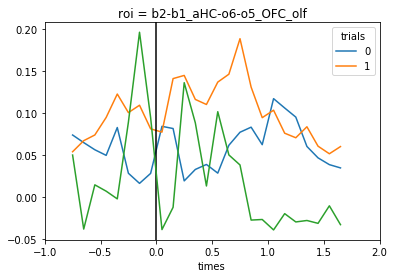

<Figure size 432x288 with 0 Axes>

In [48]:
import xarray as xr
import matplotlib.pyplot as plt 

"""Plot DFC and stats"""

subjects = ['LEFC','FERJ','SEMC','PIRJ','VACJ']
features = ['pow_HG']
path_save = join(st.path, 'feature/Conn_instant_Theta_HG_FRITE/')
conn_save = join(path_save, '{}_conn_{}_{}_E_2freqs.nc')

for su,feat in product(subjects,features):
    #load DFC, MI and stats
    dfc = xr.load_dataarray(conn_save.format(su,feat,'DFC'))
    mi_dfc = xr.load_dataarray(conn_save.format(su,feat,'MI'))
    mi_p_dfc = xr.load_dataarray(conn_save.format(su,feat,'MI_p'))
    dfc['trials'] = dfc.attrs['y']

    is_signif = (mi_p_dfc < 0.6).any('times').data * 1
    is_roi =  [1 if "OFC" in x else 0 for x in mi_p_dfc['roi'].data]
    is_sel = [True if (x==1 and y==1) else False for x,y in zip(is_signif,is_roi)]
    mi_dfc = mi_dfc.sel(roi = is_sel)
    mi_p_dfc = mi_p_dfc.sel(roi = is_sel)
    
    if len(mi_p_dfc['roi'].data) > 0:
        print(su, len(mi_p_dfc['roi'].data))
        for elec in mi_p_dfc['roi'].data:
            plt.title(su+"_aHC"+'_elecs='+str(elec))
            dfc_gp = dfc.groupby('trials').mean('trials')
            dfc_gp = dfc_gp.sel(roi=elec).plot.line(x='times')
            plt.axvline(0,color='k')
            plt.xlim(-1,2)

            #print(su, feat, mi_p_dfc['roi'].data)
            #pv_dfc_back_mean = mi_p_dfc.mean('roi')
            mi_dfc.sel(roi=elec).plot.line(x='times')
            #plt.axvline(0,color='k')
            #plt.xticks([0,5,10,15,20,25,30],labels = ['-500','0','500','1000','1500','2000','2500'])
            plt.show()
            plt.clf()